**To access the dataset stored in  Google Drive, I mounted the drive within the Google Colab environment using the following code:**

In [234]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTING REQUIRED LIBRARIES**

To perform data analysis and build the mobile price prediction model, i imported the necessary Python libraries. These libraries provide essential tools for data manipulation, visualization, and machine learning:

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor





**LOADING THE DATASET**

The dataset containing mobile features and prices was loaded into a Pandas DataFrame using the read_csv function:

In [236]:
df=pd.read_csv('/content/drive/MyDrive/Processed_Flipdata.csv')

**INSPECTING THE DATASET:**

To get a quick overview of the dataset, I used the head() function to display the first five rows():

In [237]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [238]:
df.rename(columns={'Prize': 'Price'}, inplace=True)

**CHECKING DATASEET INFORMATION:**

To gether essential information about the dataset, including the data types of each column, non-null counts, and memory usage, I used the info() function:
This provides a summary of  the dataset, helping to identify any potential missing values and understand the overall structure of the data for further preprocessing.

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Price          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


**STATISTICAL SUMMERY OF THE DATASET:**

To obtain a statistical overview of the dataset, I used the describe() function:
This function provides key descriptive statistics of such as the mean, standard deviation, minimum, and maximum values for each numerical column. This helps in understanding the central tendencies, dispersion, and overall range of the dataset.

In [240]:
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


**ANALYZINIG THE DISTRIBUTION OF MOBILE MODELS:**

To understand the frequency of different mobile models in the dataset, I used the value_counts() function on the 'model column':
This provides a summary of how many times each mobile model appears in the dataset, which helps in understandinng the distribution and variety of models present.

In [241]:
df['Model'].value_counts()

,count
Model,
vivo Y16,9
realme C55,9
SAMSUNG Galaxy A14 5G,9
REDMI Note 12 Pro 5G,9
vivo T1 44W,8
Infinix HOT 30i,8
REDMI 10,8
SAMSUNG Galaxy F14 5G,8
vivo T2x 5G,8


***UNIVARIATE ANALYSIS***

**COUNTING MODEL OCCURRENCES:**

To count the coourrences of each mobile model in the dataset, I used the value.counts().
This step helps in identifying the frequency distribution of different mobile models within the dataset, allowing for further analysis based on model-specific trends.

In [242]:
df['Model'].value_counts()

,count
Model,
vivo Y16,9
realme C55,9
SAMSUNG Galaxy A14 5G,9
REDMI Note 12 Pro 5G,9
vivo T1 44W,8
Infinix HOT 30i,8
REDMI 10,8
SAMSUNG Galaxy F14 5G,8
vivo T2x 5G,8


**VISUALIZING THE DISTRIBUTION OF MOBILE MODELS:**

To visually represent the frequency of each mobile model in the dataset, I utilized the countplot() function from the Seaborn library:
This step creates a bar plot showing the count of each mobile model, making it easier to observe patterns and outliers in the distribution.

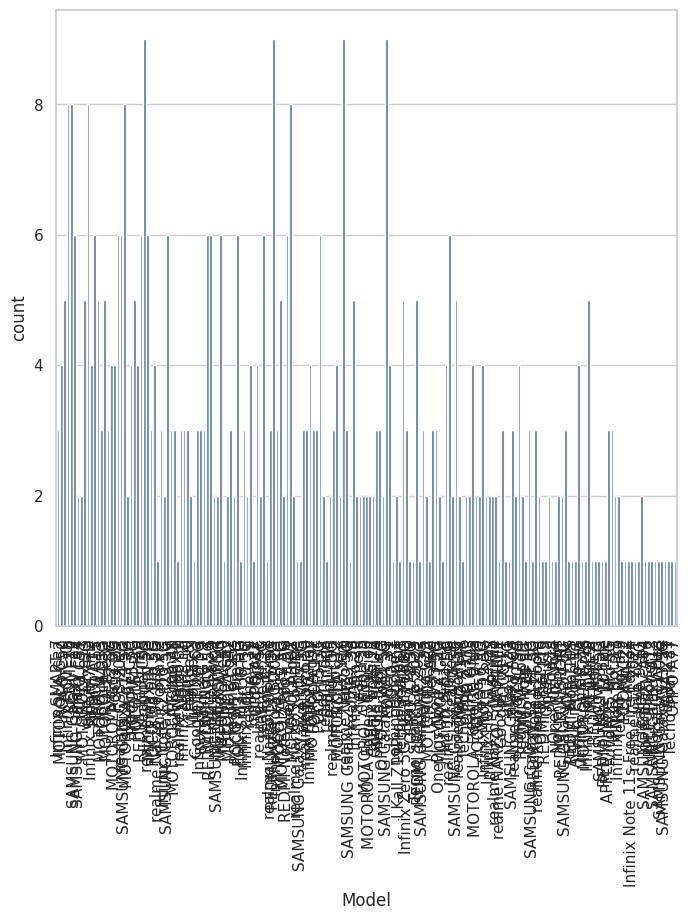

In [243]:
plt.figure(figsize=(8,8))
sns.countplot(x='Model',data=df)
plt.xticks(rotation=90)
plt.show()

**HANDLING OVERFITTED VALUES ON THE X-AXIS:**

Due to overcrowding on the x-axis in the initial count plot, i decided to simplify the 'model' column by extracting the brand name using the str.split() method:

By creating a new 'Company' column that contains only the brand name, I was able to reduce the complexity of the values on the x-axis. After applying this transformation, i re-analyzed the data and observed that Realme had the highest count compared to other mobile brands.


In [244]:
df['Company'] = df['Model'].str.split().str[0]

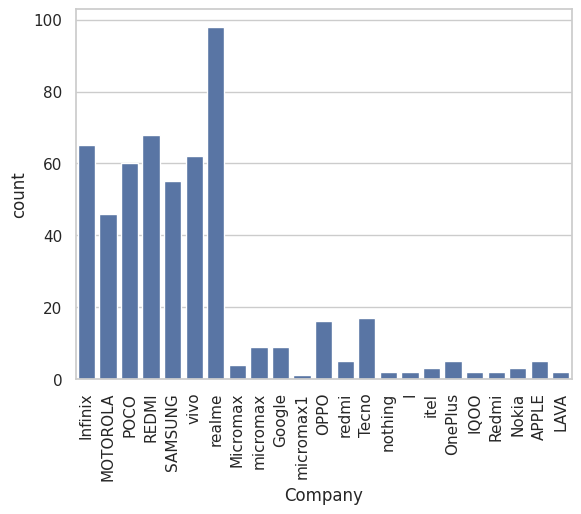

In [245]:
sns.countplot(x='Company',data=df)
plt.xticks(rotation=90)
plt.show()

**ANALYZING THE DISTRIBUTION OF RAM:**

To understand the frequency distribution of different RAM sizes in the dataset, I used the value_counts() function on the RAM column.
This step provides insight into the most common RAM sizes in the dataset, helping to identify trends or patterns related to mobile performance.



In [246]:
df['RAM'].value_counts()

,count
RAM,
4,186
8,157
6,121
3,40
2,37


**VISUALIZING THE DISTRIBUTION OF RAM:**

To visualize the frequency of different RAM sizes in the dataset, I used the Seaborn countplot() function:
After generating the plot, it became evident that 4gb is the most common among the entries, having the highest count compared to other RAM sizes.

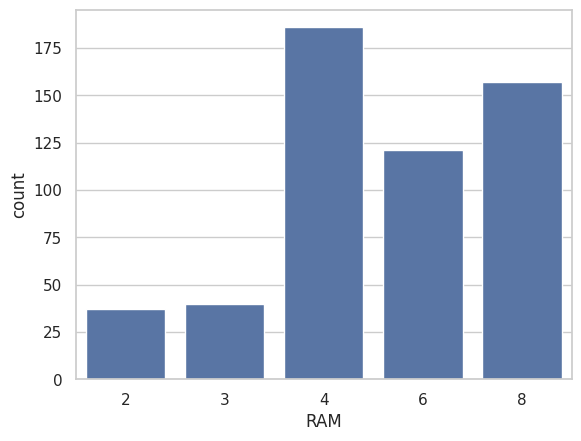

In [247]:
sns.countplot(x='RAM',data=df)
plt.show()

**ANALYZING THE DISTRIBUTION OF MEMORY:**

To examine the frequency of different memory capacities in the dataset, I used the value_counts() function on the 'Memory' column:
This step helps in identify the most common internala memory sizes for the mobile phones in nthee dataset, providing useful insights into storage trends.

In [248]:
df['Memory'].value_counts()

,count
Memory,
128,259
64,169
256,55
32,52
16,6


**VISUALIZING THE DISTRIBUTION OF MEMORY:**

To visually represent the frequeny of different memory sizes in the dataset, I utilized Seaborn's countplot() function.
The resulting plot revealed that 128gb memory has the highest count, indicating it is the most common storage capacity among the mobile phones in the dataset.

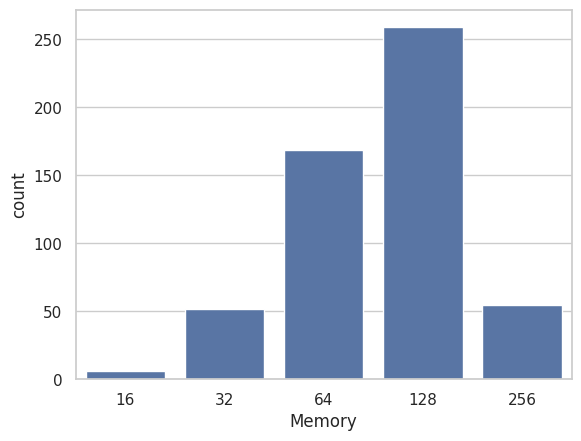

In [249]:
sns.countplot(x='Memory',data=df)
plt.show()

**ANALYZING THE DISTRIBUTION OF BATTERY CAPACITY:**

To examine the freuency distribution of different battery capacities in thet dataset, I used the value_counts() function on the 'Battery' column:
This step helps in identifying the most common battery capacities in the dataset, providing insights into power-relted features of the mobile phones.

In [250]:
df['Battery_'].value_counts()

,count
Battery_,
5000,389
6000,42
4500,26
5080,6
4980,6
4300,5
4200,5
4400,5
800,5


**VISUALIZING THE DISTRIBUTION OF BATTERY CAPACITY:**

To visualize the frequency of different battery capacities in the dataset, I used the countplot() function from Seaborn:

However, the plot displayed only a single bar for the value 5000, despite the presence of other values in the value_counts() output. This suggest that other battery capacities might have significantly fewer occurences, causing them to be visually overshadowed by the dominant 5000mAh battery category in the plot.

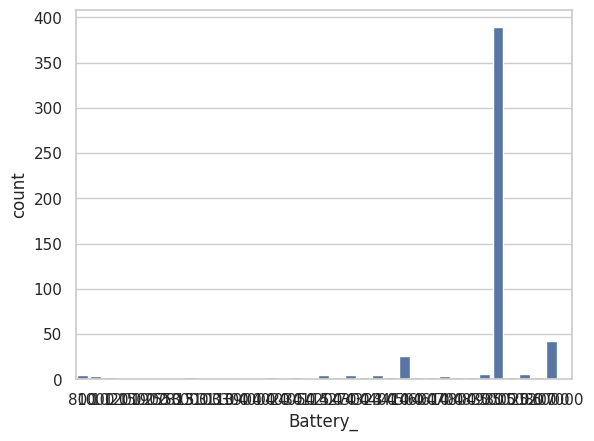

In [251]:
sns.countplot(x='Battery_', data=df)
plt.show()

**ANALYZING THE DISTRIBUTION OF AI FEATURES:**

To investigate the frequency of AI-related features in the dataset, I used the value_counts() function on the 'AI'column:
This step provides insights into the distribution of mobile devices that have AI features, allowing for further analysis of how prevalent AI is in the dataset.

In [252]:
df['AI Lens'].value_counts()


,count
AI Lens,
0,507
1,34


**VISUALIZING THE DISTRIBUTION OF AI FEATURES:**

To visually represent the presence of AI Lens features in the dataset, I used Seaborn's countplot() function:

The plot revealed that there are only two values for AI Lens-0(indicating no AI) and 1 (indicating the presence of AI Lens). The majority of the entries have a value of 0, showing that most mobile devices in the dataset do not have AI Lens features.

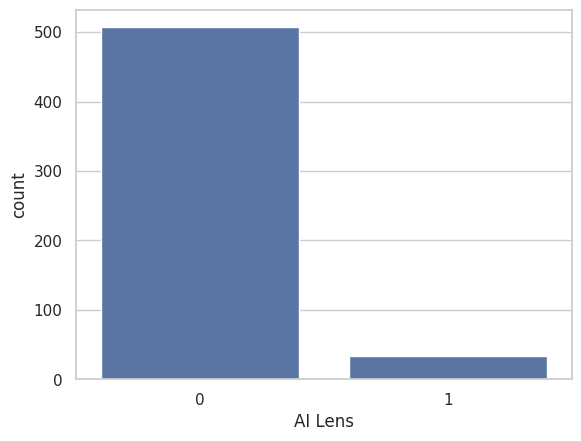

In [253]:
sns.countplot(x='AI Lens', data=df)
plt.show()

**ANALYZING THE DISTRIBUTION OF MOBILE HEIGHT:**

To understand the frequency of different mobile heights in the dataset, I used the value_counts() function on the 'mobile height' column:

This step helps identify the most common mobile heights, providing insight into the physical dimensions of the devices in the dataset.

In [254]:
df['Mobile Height'].value_counts()

,count
Mobile Height,
16.76,126
16.51,64
16.94,53
17.02,36
16.71,34
16.56,22
16.36,21
16.66,20
16.64,20


**VISUALIZING THE DISTRIBUTION OF MOBILE HEIGHT:**

To visualize the frequency of different mobile heights in the dataset, I employed Seaborn's countplot() function:

The plot showed that the height 16.76 cm has thet maximum count, indicating it is the most commonn height among the mobile devices in the dataset.

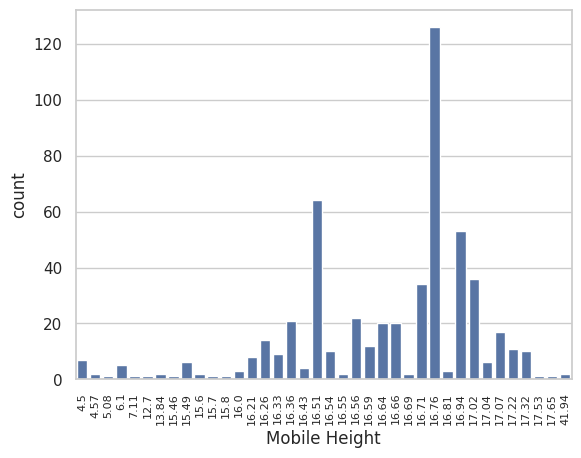

In [255]:
sns.countplot(x='Mobile Height', data=df)
plt.xticks(rotation=90,fontsize=8)
plt.show()

**ANALYZING THE DISTRIBUTION OF REAR CAMERA SPECIFICATIONS:**

To examine the frequency distribution of different rear camera specifications in the dataset, I used the value_counts() function on the 'rear camera' column.
This step provides insights into the most common rear camera resolutions among the mobile devices, helping to understand trends in camera features.

In [256]:
df['Rear Camera'].value_counts()

,count
Rear Camera,
50MP,260
13MP,63
64MP,62
8MP,52
48MP,31
108MP,31
0MP,10
12MP,10
200MP,8


**VISUALIZING THE DISTRIBUTION OF REAR CAMERA SPECIFICATIONS:**

To visualize the frequency of different rear camera specifications in the dataset, I used Seaborn's countplot() function:
The plot revealed that 50mp rear cameras have the highest count, indicating that 50mp is the most common resolution for rear cameras among the mobile devices in the dataset.

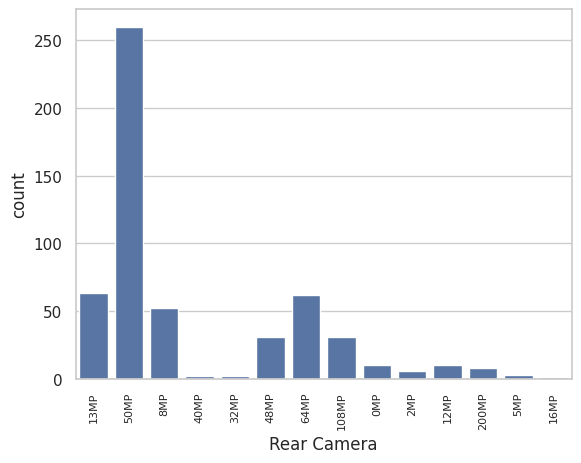

In [257]:
sns.countplot(x='Rear Camera', data=df)
plt.xticks(rotation=90,fontsize=8)
plt.show()

**ANALYZING THE DISTRIBUTION OF FRONT CAMERA SPECIFICATIONS:**

To analyze the frequency distribution of different front camera specifications in the dataset, I used the value_counts() function on the 'Front camera' column.
This step provides insight into the most common front camera resolutions among the mobile derices, helping to understand trends in selfie camera features.

In [258]:
df['Front Camera'].value_counts()

,count
Front Camera,
16MP,164
5MP,135
8MP,129
13MP,49
32MP,22
0MP,16
50MP,7
12MP,6
60MP,4


**VISUALIZING THE DISTRIBUTION OF FRONT CAMERA SPECIFICATIONS:**

To visualise the frequency of different front camera resolutions, I used Seaborn's countplot() function.
The plot revealed that 5mp is the most common front camera resolution, having the highest count among the mobile devices in the dataset.

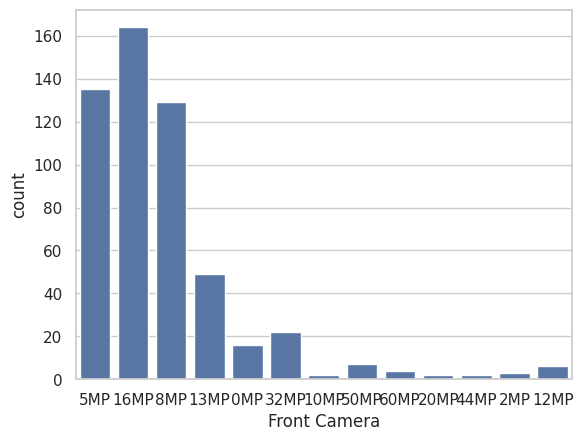

In [259]:
sns.countplot(x='Front Camera', data=df)
plt.show()

**CLEANING THE PRIZE COLUMN:**

To clean the 'prize' column by removing any commas and converting the values to integers for numerical analysis, I used the following column code:
This step ensures that the 'prize' values are correctly formatted as integers, making them suitable for statistical calculations and further analysis.

In [260]:
df['Price'] = df['Price'].str.replace(',', '').astype('int64')

***Bivariate Analysis: RAM vs PRIZE***

To explore the relationship between RAM and the Price of mobile devices, I performed a barplot using Seaborn:
From the barplot, I observed a positive correlation: as the price of the mobile increases, the RAM also tends to increase. This indicates that higher-priced models generally come with larger RAM capacities.

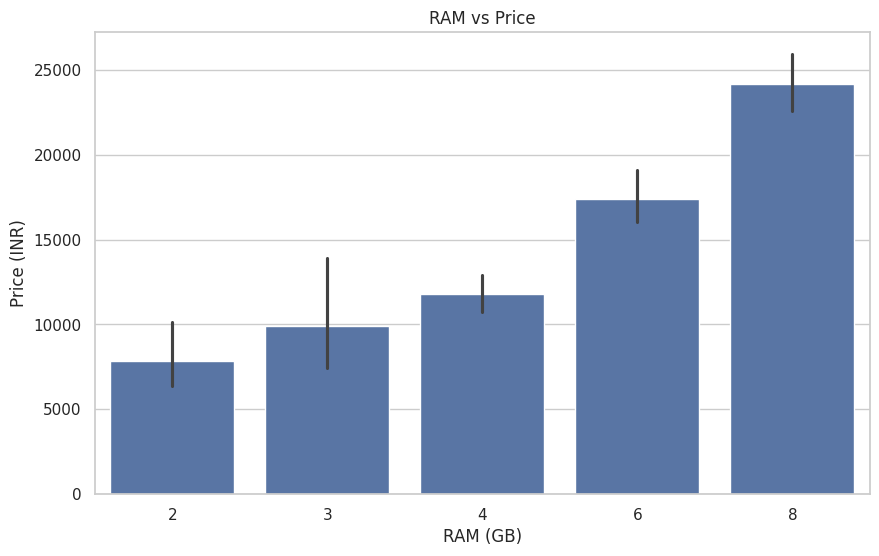

In [261]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='RAM', y='Price', data=df)
plt.title('RAM vs Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (INR)')
plt.show()

**Bivariate Analysis: MEMORY vs PRIZE**

To analyze the relationship between memory capacity and price, I used a bar plot with Seaborn:
From the barplot, I observed a positive correlation between the memory and prize. This suggest that mobile devices with larger memory capacities tend to have higher prize, indicating that increased storage is associated with increased value.

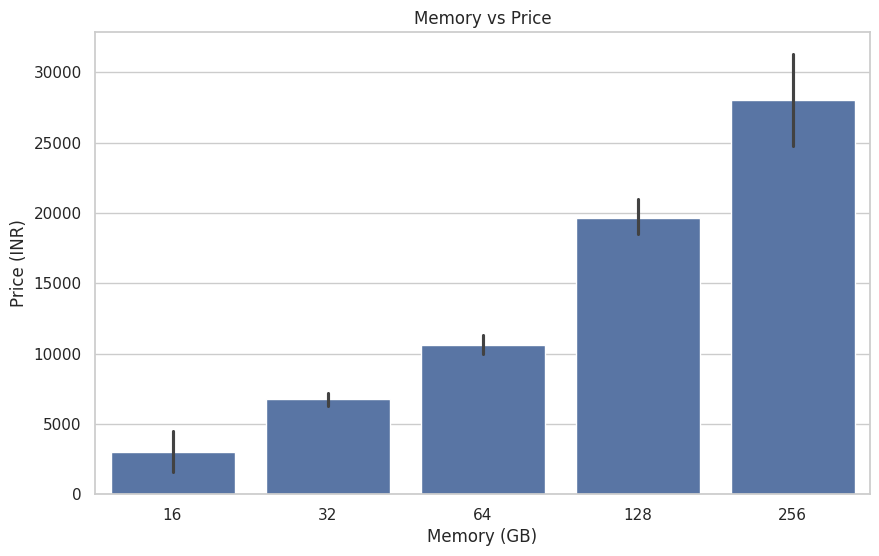

In [262]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Memory', y='Price', data=df)
plt.title('Memory vs Price')
plt.xlabel('Memory (GB)')
plt.ylabel('Price (INR)')
plt.show()

**Bivariate Analysis: BATTERY vs PRIZE**

Barplot visualizing the relationship between battery capacity and price. From what i can interpret based onn the plot:


*   There appears to be some positive correlation between battery capacity and price, meaning that as battery capacity increases, the price tends to increase for cartain ranges.
*   However, the correlation seems inconsistent, with a few peaks (e.g., around 2815mAh, 4000mAh, and 5000mAh)where for those battery capacities, while other capacities have lower prices.





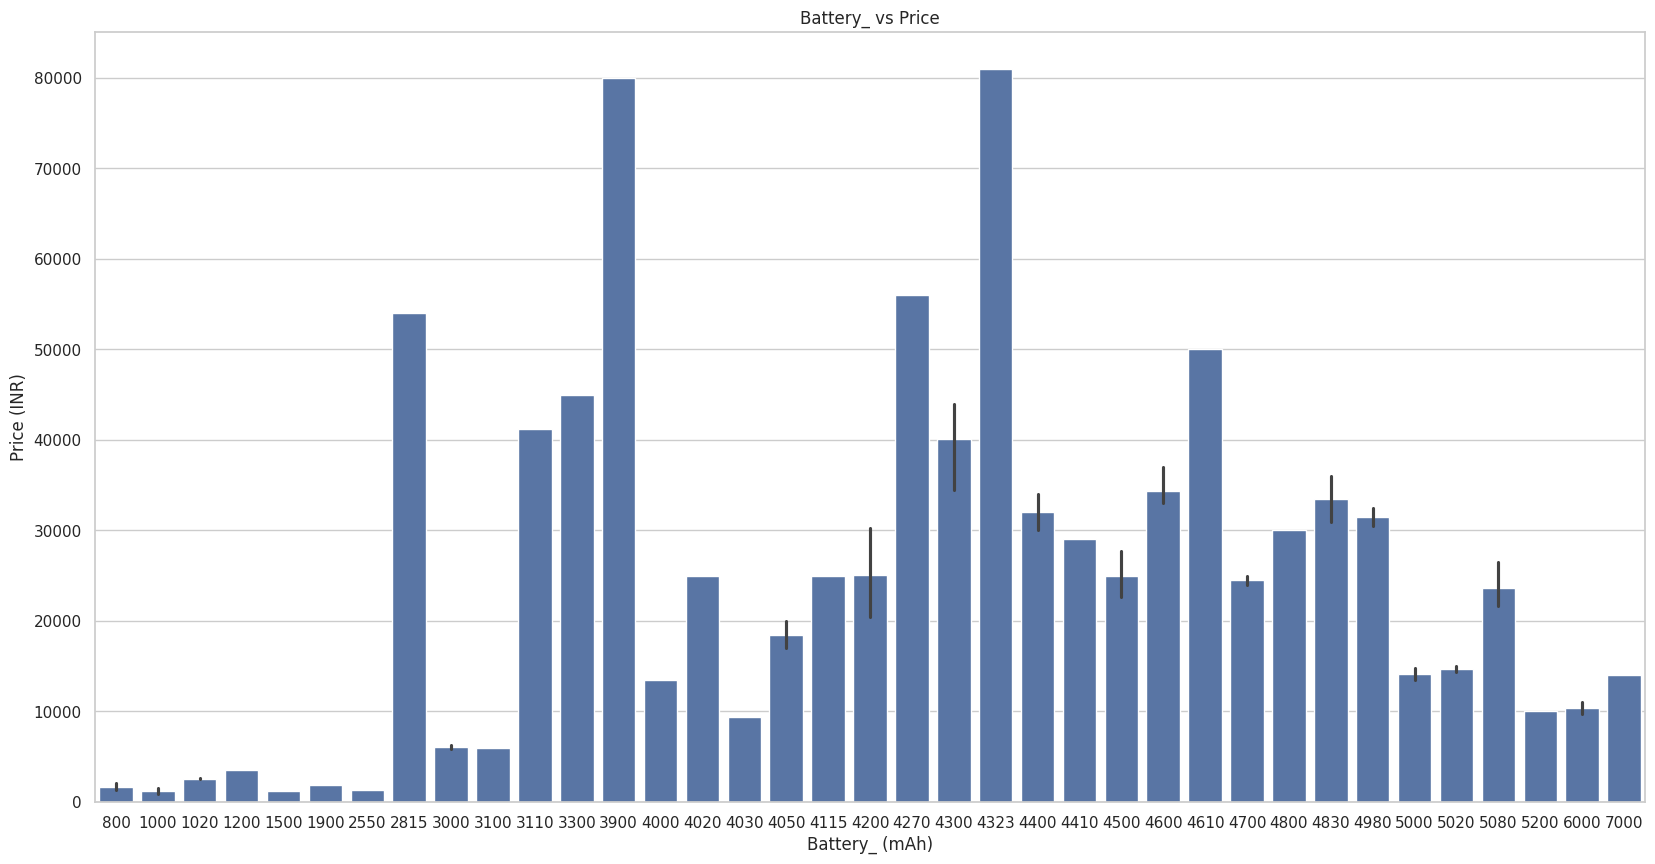

In [263]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,10))
sns.barplot(x='Battery_', y='Price', data=df)
plt.title('Battery_ vs Price')
plt.xlabel('Battery_ (mAh)')
plt.ylabel('Price (INR)')
plt.show()

**Bivariate Analysis: PROCESSOR vs PRIZE**

Barplot visualizing the relationship between processor and price. From what i can interpret based on the plot:

There appears to be some positive correlation between processor and price, meaning that as processor power increases, the price tends to increase for certain ranges.

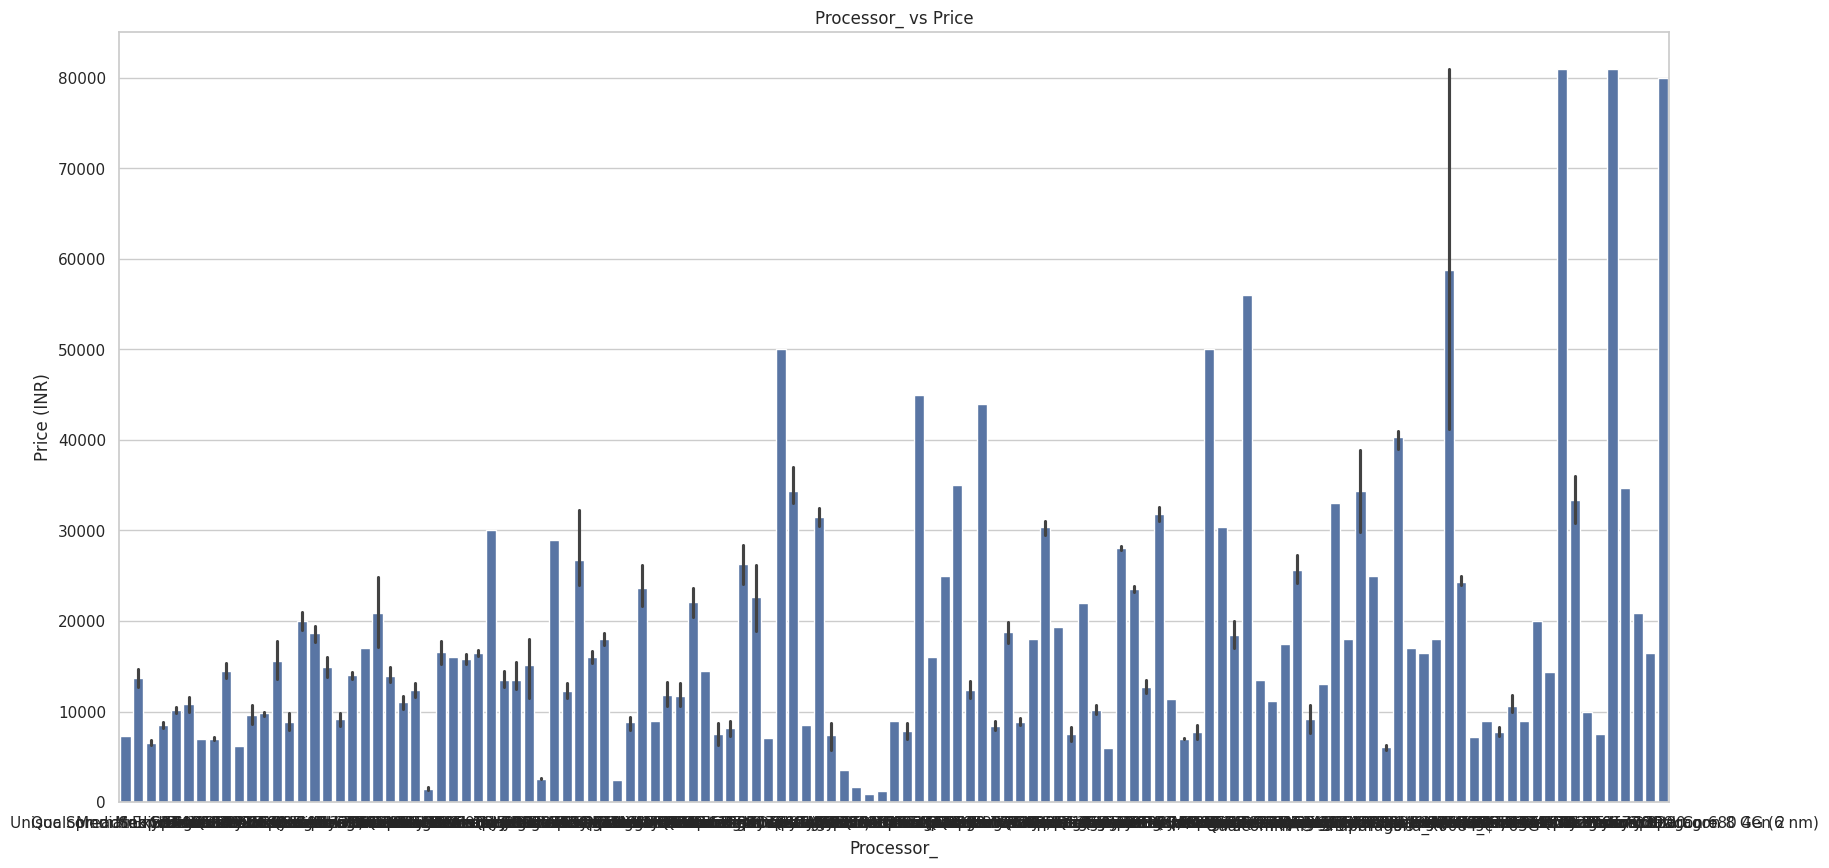

In [264]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,10))
sns.barplot(x='Processor_', y='Price', data=df)
plt.title('Processor_ vs Price')
plt.xlabel('Processor_')
plt.ylabel('Price (INR)')
plt.show()

**Bivariate Analysis:RAM vs MEMORY WITH PRICE INFLUENCE**
To further explore the relationship between RAM and Memory while considering the price factor, I plotted a bar plot using Seaborn:
From the plot, I observed that as price increases, there is a general trend where RAM also increases. This relationship indicated that higher-priced devices tend to offer greater memory and RAM capacities, reflecting the overall value of the devices.


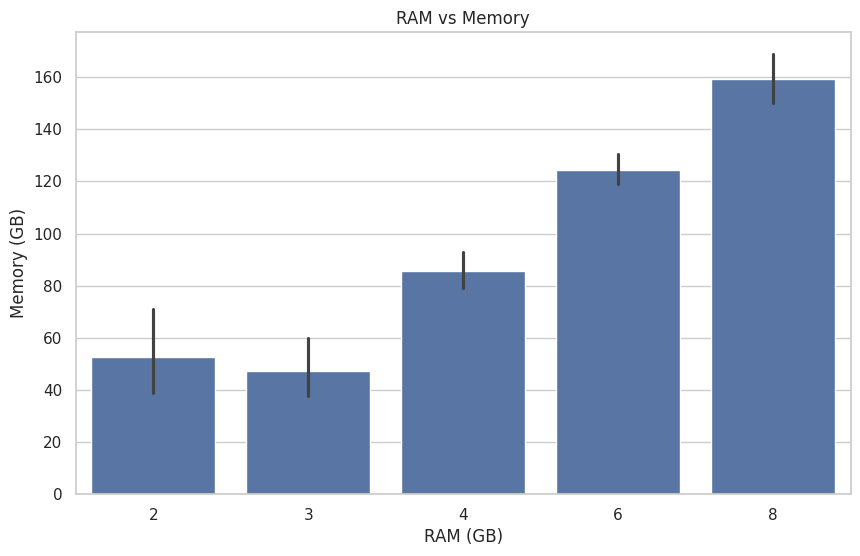

In [265]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='RAM', y='Memory', data=df)
plt.title('RAM vs Memory')
plt.xlabel('RAM (GB)')
plt.ylabel('Memory (GB)')
plt.show()

**Bivariate Analysis: BATTERY vs RAM**

To analyze the relationship between RAM and battery capacity, I plotted a bar plot using seaborn:
The resulting plot displaying five bars corresponding to RAM sizes of 2gb,3gb,4gb,6gb and 8gb. Interestingly, ball bars reached the same height at around 5000mAh on the y-axis, indicating that regardless of the RAM size, the mobile deives in the dataset generally have a battery capacity of 5000mAh.
This suggests that battery capacity remains consistent with different RAM sizes
in the dataset.

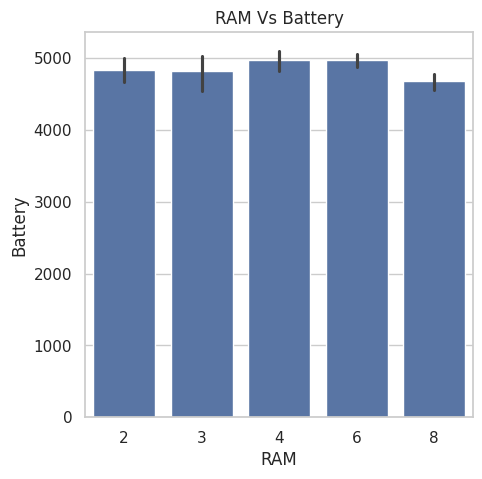

In [266]:
sns.set(style='whitegrid')
plt.figure(figsize=(5, 5))
sns.barplot(x='RAM', y='Battery_', data=df)
plt.title('RAM Vs Battery')
plt.xlabel('RAM')
plt.ylabel('Battery')
plt.show()

**Bivariate Analysis: RAM vs PROCESSOR**
The plot shows multiple vertical bars, each representing different values of RAM (on the x-axis) and their corresponding Processor values (on the y-axis).
the geight of the bars represents the processor count for each RAM size.
RAM values (ranging from 2GB to 8GB) are plotted against the Processor types (ranging from 1 to 8 on the y-axis).

**OBSERVATION**
There appears to be some distribution of processor values across different RAM size, but the plot does not indicate a clear or cosistent pattern. The bars shows a lot of variability, meaning that the distribution of processor values is scattered across different RAM capacities. 8GB RAM seems to have the highest concentration of high-performance processors, as shown by the taller bars.

**CONCLUSION:**
There may be a loose correlation between RAM and processor, where higher RAM sizes are generally paired with higher processors. Still, the relationship does not appear strongly linear or consistent across all RAM sizes.

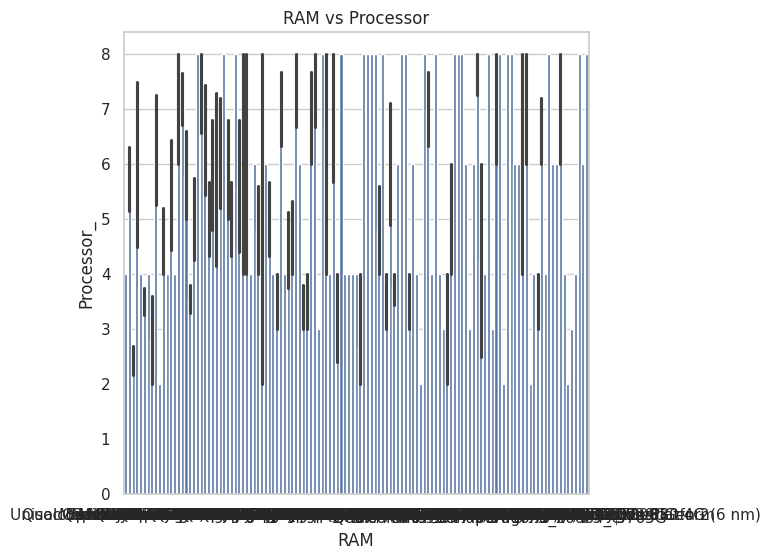

In [267]:
sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))
sns.barplot(x='Processor_', y='RAM', data=df)
plt.title('RAM vs Processor')
plt.xlabel('RAM')
plt.ylabel('Processor_')
plt.show()

<Axes: xlabel='Memory', ylabel='Processor_'>

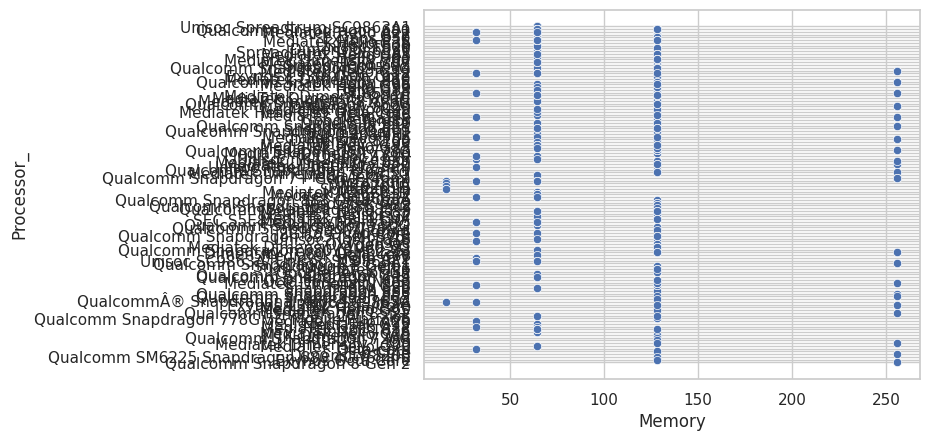

In [268]:
sns.scatterplot(x='Memory',y='Processor_',data=df)

<Axes: xlabel='Battery_', ylabel='Processor_'>

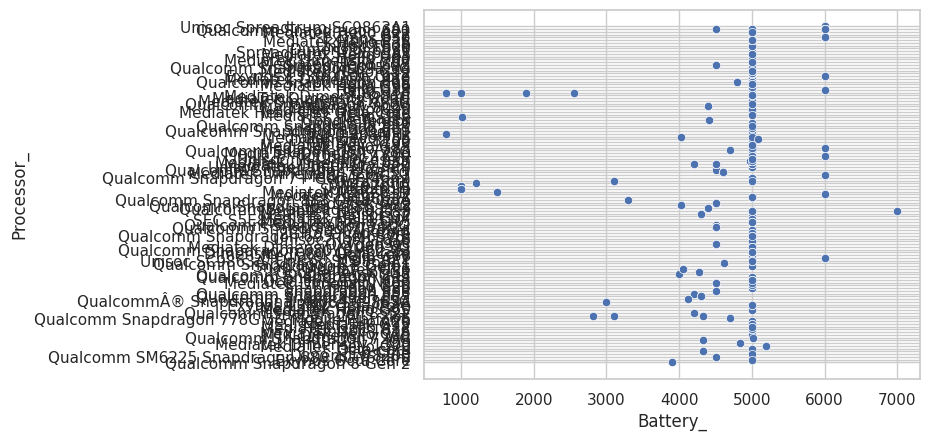

In [269]:
sns.scatterplot(x='Battery_',y='Processor_',data=df)

**EXTRACTING CATEGORICAL FEATURES**

To extract the categorical features from  the dataset, I used the select_dtypes() function from Pandas to select columns with the data type object:
This step resulted in 6 columns: MODEL, COLOUR, REAR CAMERA, FRONT CAMERA, PROCESSOR and COMPANY. These columns represent the categorical features in the dataset, which will be useful for further analysis and feature encoding.

In [270]:
category_data=df.select_dtypes(include=['object'])
category_data.head()

,Model,Colour,Rear Camera,Front Camera,Processor_,Company
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1,Infinix
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1,Infinix
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680,MOTOROLA
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22,POCO
4,Infinix HOT 30i,Marigold,50MP,5MP,G37,Infinix


**COUNTING UNINQUE VALUES IN THE 'MODEL' COLUMN:**

To identify the number of the unique values in the model column, I used the nunique() method. This step revealed that there are 187 unique models in the dataset, which indicates a high variety of mobile phone models.

In [271]:
category_data['Model'].nunique()

187

**FINDING VALUES IN THE 'MODEL' COLUMN:**

after determining the number of unique modles, I proceeded to extract the actual unique values from the model column using the unique() method.
this allowed me to list all the 187 unique models present in the dataset, which can be further utilized for analysis or feature encoding.

In [272]:
category_data['Model'].unique()

array(['Infinix SMART 7', 'MOTOROLA G32', 'POCO C50', 'Infinix HOT 30i',
       'REDMI 10', 'SAMSUNG Galaxy F13', 'SAMSUNG Galaxy F04', 'POCO C51',
       'MOTOROLA e13', 'vivo T2x 5G', 'Infinix Smart 7 HD', 'REDMI A1+',
       'POCO C55', 'MOTOROLA g13', 'POCO M4 5G', 'MOTOROLA e32',
       'vivo T2 5G', 'MOTOROLA G62 5G', 'POCO M5', 'realme C33 2023',
       'SAMSUNG Galaxy F14 5G', 'MOTOROLA g73 5G', 'realme C30',
       'POCO X5 5G', 'POCO M4 Pro', 'REDMI 11 Prime', 'realme C55',
       'realme 10 Pro 5G', 'Micromax IN 2C', 'POCO M4 Pro 5G',
       'realme Narzo 30 Pro 5G', 'micromax 2', 'Infinix Note 12 Pro 5G',
       'SAMSUNG Galaxy F23 5G', 'micromax', 'MOTOROLA Edge 40',
       'micromax 1', 'realme Narzo 30', 'Infinix NOTE 12i', 'realme 10',
       'realme 8i', 'Micromax 3', 'Google Pixel 6a', 'Infinix HOT 20 5G',
       'realme GT 2', 'REDMI Note 12', 'REDMI Note 12 5G', 'micromax 3',
       'SAMSUNG Galaxy M04', 'REDMI K50i 5G', 'MOTOROLA e40',
       'REDMI 9 Activ', 'MOTO

In [273]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
category_data['Model'].value_counts()

,count
Model,
vivo Y16,9
realme C55,9
SAMSUNG Galaxy A14 5G,9
REDMI Note 12 Pro 5G,9
vivo T1 44W,8
Infinix HOT 30i,8
REDMI 10,8
SAMSUNG Galaxy F14 5G,8
vivo T2x 5G,8


**COUNTING UNINQUE VALUES IN THE MODEL 'COLOUR' COLUMN:**

To identify the number of the unique values in the COLOUR column, I used the nunique() method. This step revealed that there are 275 unique colours in the dataset, which indicates a high variety of mobile phone colours.

In [274]:
df['Colour'].nunique()

275

**DROPPING THE 'UNNAMED' COLUMN:**

TO clean the dataset, I dropped the unnecessary column labeled 'Unnamed' using the drop() method. This step ensured that the dataset remained focused on relevent features, enhancing the clarity and usability of the data for further analysis.

In [275]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [276]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price,Company
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Infinix
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Infinix
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999,MOTOROLA
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649,POCO
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999,Infinix


**VISUALIZING RELATIONSHIP: PAIR PLOT**

To visualize the relationships between multiple features in the dataset, I created a pair plot using seaborn. The pair plot provides scatter plots for each pair of numerical features. This visualization helps to identify potential correlations, trends, and distributions within the data, facilitating a deeper understanding of how different variables interact with each other.

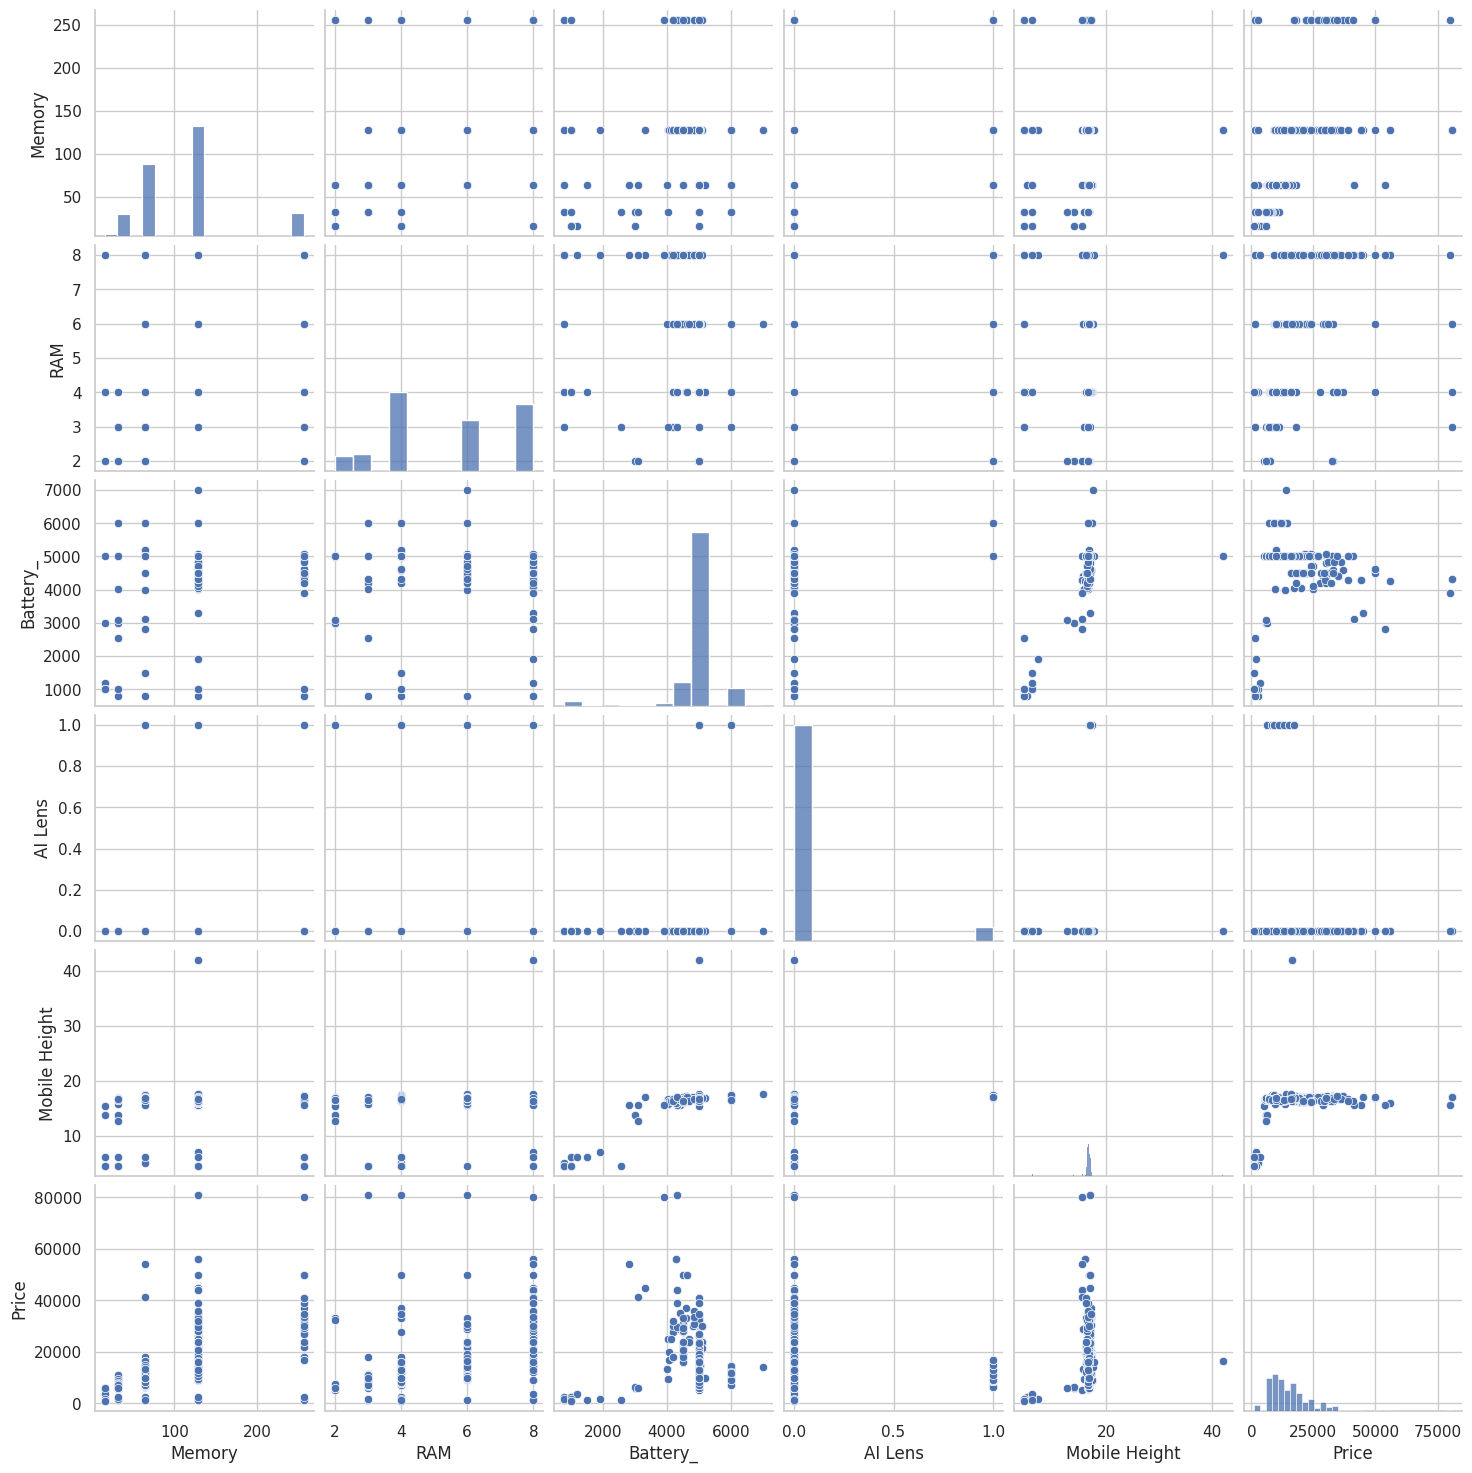

In [277]:
sns.pairplot(df)

**PLOTTING HISTOGRAM OF RAM:**

To visualize the distribution of RAM in the dataset, I plotted a histogram with RAM on the x-axis and frequency on the y-axis.

**OBSERVATION**

The x-axis ranged from 0 to 8gb, while the y-axis ranged from 0 to 140.
There were two bars between 2 to 3 gb of RAM, with frequencies ranging between 20 to 40.
A prominent bar at 4gb reached a frequency of about 130.
Another bar at 6gb peaked at approximately 90.
Finally, the bat at 8gb reached a frequency of around 65.
The histogram provides insights into the distribution of RAm capacities among the mobile devices in nthe dataset, indicating that 4gb is the most common RAM configuration.

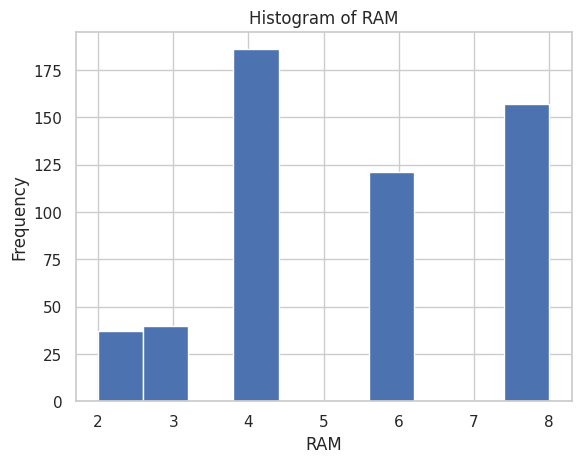

In [278]:
plt.hist(df['RAM'])
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.title('Histogram of RAM')
plt.show()

**PLOTTING HISTOGRAM OF MEMORY**:

I visualized the distribution of Memory using a histogram, where the x-axis repsented Memory, and the y-axis represented Frequency.

OBSERVATION

The x-axis ranged from 0 to 250gb, and the y-axis ranged from 0 to 250. The first bar,represented memory values between 0 to 50 gb, had a frequency of about 55. The second bar, for memory values between 50 to 100gb, had a significantly higher frequency of 170. The third bar, for memory between 100gb to 150gb, had the highest frequency at 255. Lastly a bar between 140 to 150gb had a frequency of 51. The histogram revealed that 100 to 150 gb memory capacity is the most common among devices, while the 50 to 100 gb range is also highly prevalent.

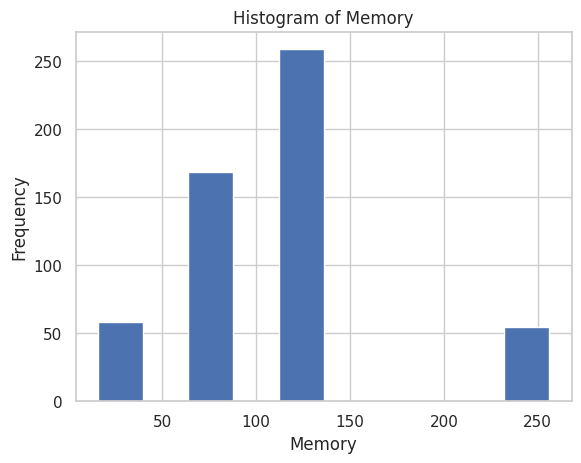

In [279]:
plt.hist(df['Memory'])
plt.xlabel('Memory')
plt.ylabel('Frequency')
plt.title('Histogram of Memory')
plt.show()

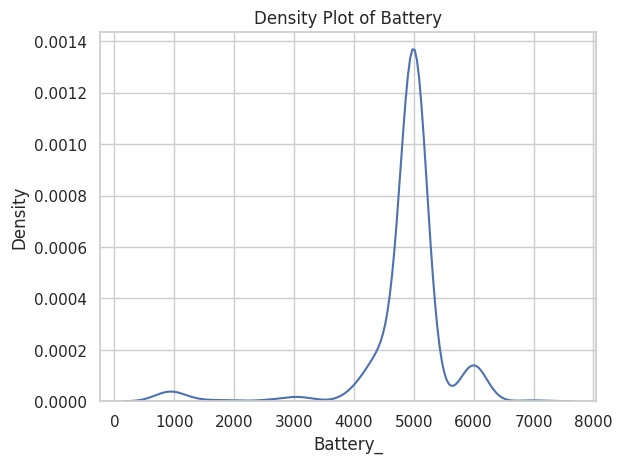

In [280]:
sns.kdeplot(df['Battery_'])
plt.xlabel('Battery_')
plt.ylabel('Density')
plt.title('Density Plot of Battery')
plt.show()

**EXTRACTING NUMERIC DATA:**

To focus on numeric data in the dataset, I used the df.select_dtypes() function to etract only columns of type int64 and float64. This helped isolate numercal features for further analysis and modelling, i obtained 6 numeric columns Memory,	RAM,	Battery_,	AI Lens,	Mobile Height,	Prize. These columns contain the key numerical data which will be essential for statistical analysis, correlation checks, ,and machine learning model building.


In [281]:
numeric_data=df.select_dtypes(include=['int64','float64'])
numeric_data.head()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
0,64,4,6000,1,16.76,7299
1,64,4,6000,1,16.76,7299
2,128,8,5000,0,16.64,11999
3,32,2,5000,0,16.56,5649
4,128,8,5000,1,16.76,8999


**CORRELATION ANALYSIS OF NUMERIC DATA:**

To explore the relationships between the numeric columns in the dataset, I computed the correlation matrix using numeric_data.corr(). This matrix shows the correlation coefficients between each pair of numeric variables, which helps in identifying how changes in one feature are associated with changes in another.

**OBSERVATIONS**

Memory vs Ram: There is strong positive correlation of 0.625, indicating that as RAM increases, Memory tends to increase as well.

Ram vs Prize: The correlation is 0.532, showing a moderate positive correlation, meaning higher Ram is associated with a higher prize.

Mobile Height vs Battery: A high positive correlationn of 0.695, indicating that larger mobile heights are likely to have larger batteries.

Prize vs Memory: There is a positive correlation of 0.566, suggesting that higher memory is associated with higher prices.

AI Lens vs. Prize: A weak negative correlation of -0.153, indicating a slight inverse relationship between AI Lens and price.

Battery vs Prize: Surprisingly, there's a weak negative correlation of -0.034, indicating between battery size and prize.

This analysis helps in understanding how different features interact, especially for building machine learning models where correlation impacts the model's selection process.

In [282]:
numeric_data.corr()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
Memory,1.000000,0.625284,-0.053210,-0.094442,0.063163,0.566660
RAM,0.625284,1.000000,-0.104923,-0.082622,0.092951,0.532024
Battery_,-0.053210,-0.104923,1.000000,0.150156,0.695641,-0.034297
AI Lens,-0.094442,-0.082622,0.150156,1.000000,0.052018,-0.153691
Mobile Height,0.063163,0.092951,0.695641,0.052018,1.000000,0.176009
Price,0.566660,0.532024,-0.034297,-0.153691,0.176009,1.000000


**Before outliers remove**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='RAM'>

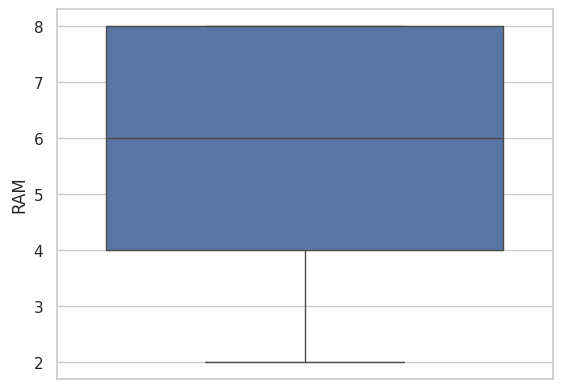

In [283]:
sns.boxplot(df['RAM'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Memory'>

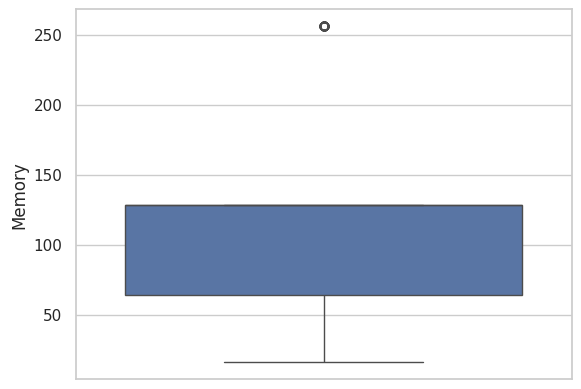

In [284]:
sns.boxplot(df['Memory'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Battery_'>

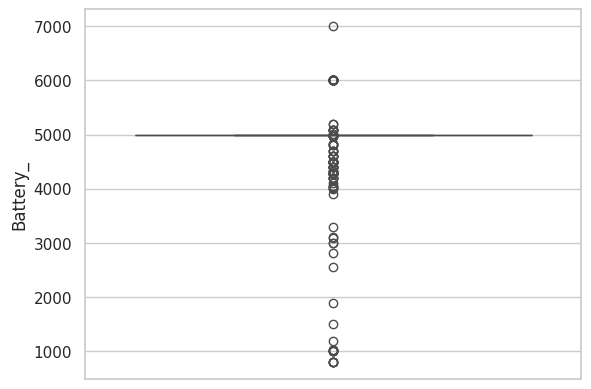

In [285]:
sns.boxplot(df['Battery_'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Price'>

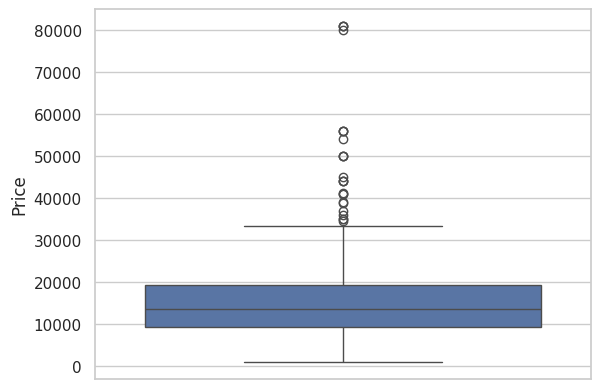

In [286]:
sns.boxplot(df['Price'])


**REMOVING OUTLIERS USING A CUSTOM DEF FUNCTION:**

To remove outliers from the dataset for features such as RAM, MEMORY,BATTERY and PRIZE, I defined a custom function. This function removed values that fell outside the interquartile range(IQR), a common technique to handle outliers:

**RATIONALE:**

Interquartile Range (IQR) method, this approach defined outliers as data points that lie 1.5 times the IQR below the first quartile or above the third quartile.
The function ensured that only valid data points,which fall within the IQR range, were retained for the selected features. This step helped clean the dataset by removing extreme values (outliers) in the RAM,MEMORY,BATTERY and PRIZE columns, thereby ensuring more reliable and consistent data for further analysis.

In [287]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]

In [288]:
df=remove_outliers(df,'RAM')
df=remove_outliers(df,'Memory')
df=remove_outliers(df,'Battery_')
df=remove_outliers(df,'Price')

**GRAPHS AFTER REMOVING OUTLIERS**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Battery_'>

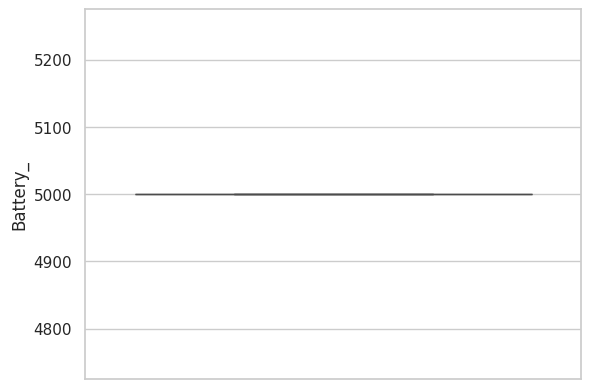

In [289]:
sns.boxplot(df['Battery_'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='RAM'>

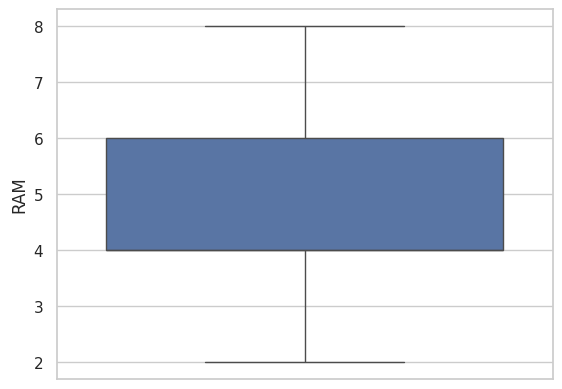

In [290]:
sns.boxplot(df['RAM'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Memory'>

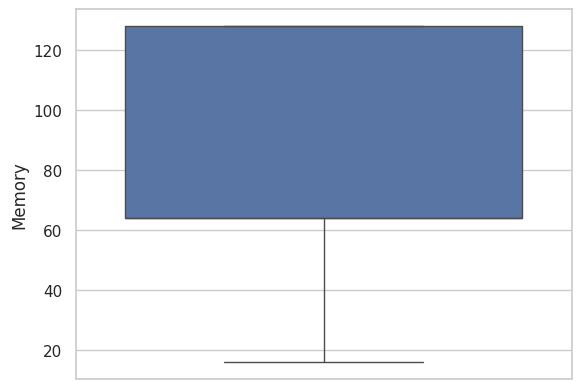

In [291]:
sns.boxplot(df['Memory'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Price'>

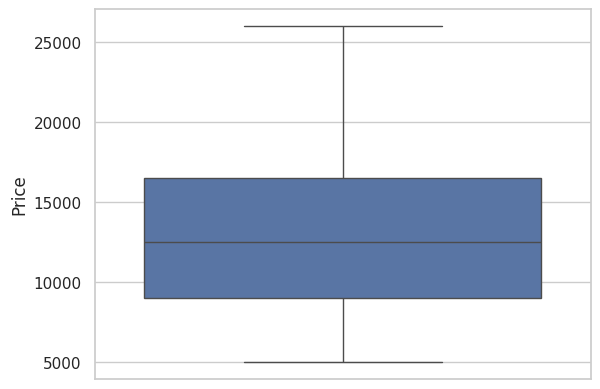

In [292]:
sns.boxplot(df['Price'])

after removing the outliers I applied Label Encoding to the categorical columns processor, rear camera, and front camera. This step was necessary to convert these categorical features into numeric values, which is essential for machine learning models.

PURPOSE OF LABEL ENCODING:

Processor: converted each processor name into a numeric lable.

Rear Camera: Transformed different rear camera specifications into numeric labels.

Front camera: Converted different front camera specifications into numeric values.

This step allows these categorical columns to be used effectively in machine learning algorithms that require numerical input, such as regression, decision trees, and other models.

In [293]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['Processor_encoded']=encoder.fit_transform(df['Processor_'])
df['Rear_camera_encoded']=encoder.fit_transform(df['Rear Camera'])
df['Front_camera_encoded']=encoder.fit_transform(df['Front Camera'])


After applying Label Encoding to the categorical features, I proceeded with Standard Scaling t scale the numerical data. This step ensures that all numerical features have a mean of 0 and a standared deviation of 1, which is crucial for lagorithms like regression etc, which rely on the magnitude of values for performance.

**PURPOSE OF SCALING:**

MEMORY: Memory values now have comparable scales, which ensures uniformity.

RAM: Scaled RAM values so that they are centered and normalized.

Battery: Helps normalize battery capacities to remmove any bias.

AI Lens, Mobile Height, and Prize: All these features are now scaled to avoid large disparities in magnitude that can affect model training.

This step was crucial to ensure that no feature nominates others due to its larger scale, thus improving the overall performance and convergence of machine leanring models.

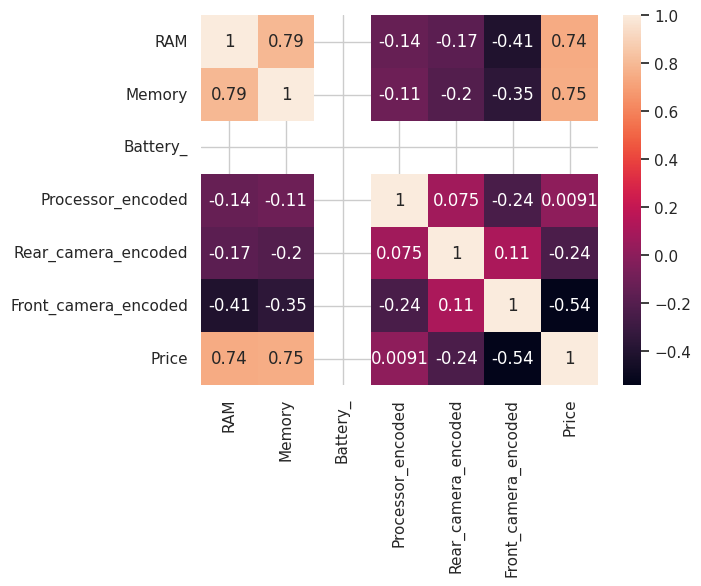

In [294]:
heatmap = sns.heatmap(df[['RAM','Memory','Battery_','Processor_encoded','Rear_camera_encoded','Front_camera_encoded','Price']].corr(),annot=True)
plt.show()

In [295]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [296]:
df_stdn=scaler.fit_transform(df[['RAM','Memory','Battery_','Processor_encoded','Rear_camera_encoded','Front_camera_encoded','Price']])

In [297]:
df_stdn = pd.DataFrame(df_stdn, columns=['RAM','Memory','Battery_','Processor_encoded','Rear_camera_encoded','Front_camera_encoded','Price'])


To split the data info features (X) and the target variable (y), below is the code for performing this step:

x: This will contain all the features (except the 'prize'column).

y: This is the target variable (the 'prize' column), which the model will try to predict.


In [298]:
X=df_stdn.drop('Price',axis=1)
y=df_stdn['Price']

I used train_test_split from sklearn.model_selection to split the dataset into training and testing sets.

X_train, X_test,y_train,y_test: These are the training and testing sets for the features (X) and the target (y).

test_size=0.2: This specifies that 20% of the data will be used for testing, and the remaining 80% for training.

random_state=42: Ensures reproducibility of the results.



In [299]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=42)

**FITTING THE LINEAR REGRESSION MODEL ON TRAININIG DATA**

To apply Linear Regression after splitting the data into training and testing sets, I have followed these steps

IMPORT LINEAR REGRESSION

FIT THE MODEL ON THE TRAINING DATA

In [300]:
from sklearn.linear_model import LinearRegression

In [301]:
lr=LinearRegression()

In [302]:
lr.fit(X_train,y_train)

LinearRegression()

In [303]:
y_pred=lr.predict(X_test)

**MODEL EVALUATION RESULTS**

After evaluating the Linear Regression model on the test data, here are the metrics I obtained:

Mean Squared Error (MSE): 0.599

Mean Absolute Error (MAE): 0.444

R2 Score: 0.671

**CONCLUSION OF MODEL METRICS**:

Mean Squared Error (MSE = 0.599): This indicates that, on average, the squared difference between the predicted and actual values of the prize is relatively now. A lower MSE is desirable, and in this case, it's small, suggesting that the model is not too far off in its predictions.

Mean Absolute Error (MAE = 0.444): This shows that, on average, the model's predictions deviate from the actual values by 0.444 units of prize. This error is not too large, meaning the model predictions are fairly close to the actual values.

R2 Score (0.671): The R2 Score means thata approximately 67.1% of the variability in the prize is explained by the moodel. While this is a good starting point, there's stll about 32.9% of the variance that the model does not account for. This suggests that the model fits reasonably well but can be improved.





In [304]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test, y_pred)
print(mse)
print(mae)
r2 = r2_score(y_test, y_pred)
print(r2)

0.5992002674647882
0.4449582287275673
0.6719154424565685


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [305]:
accuracy_score = lr.score(X_test, y_test)
print("Accuracy:", accuracy_score)

Accuracy: 0.6719154424565685


**CONCLUSION AFTER USING GRIDSEARCHCV AND RANDOM FOREST REGRESSOR:**

After applying GridSearchCV and RandomForestRegressor, the model's performance significantly improved:

Mean squared error (MSE = 0.361): The MSE has been reduced further which means the model's predictions are now much closer to the actual values, indicating a better fit.

Mean Absolute Error (MAE = 0.14): The MAE has dropped substantially, meaning the average deviation between the preducted and actual prize values is now much smaller. This indicates a higher level of accuracy in the model's predictions.

Overall Conclusion:

By switching to RandomForestRegressor and using GridSearchCV for hyperparameter tuning, the model's accuracy has improved drastically. The lower MSE and MAE show that thisrefined model is much bettercompared to the earlier model. This suggests that RandomForestRegressor is a better fit for this dataset, capturing more variance and yielding more precise results.

In [306]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [307]:
pram_grid = {'n_estimators':[100,200,300],'max_depth':[10,20,None],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'bootstrap':[True,False]}

In [308]:
rf= RandomForestRegressor(random_state=4)
grid_search=GridSearchCV(estimator=rf,param_grid=pram_grid,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1,verbose=2)

In [309]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=4), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=2)

In [310]:
best_params = grid_search.best_params_
print(best_params)

{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [311]:
 best_rf_model = grid_search.best_estimator_
 y_pred = best_rf_model.predict(X_test)

In [312]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.1469578692466349


In [313]:
mse = mean_squared_error(y_test, y_pred, squared=False)
print(mse)

0.3612072868624495


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [314]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.8807784405486073


In [315]:
accuracy_score = best_rf_model.score(X_test, y_test)
print("Accuracy:", accuracy_score)

Accuracy: 0.8807784405486073


In [316]:
residuals = y_test - y_pred

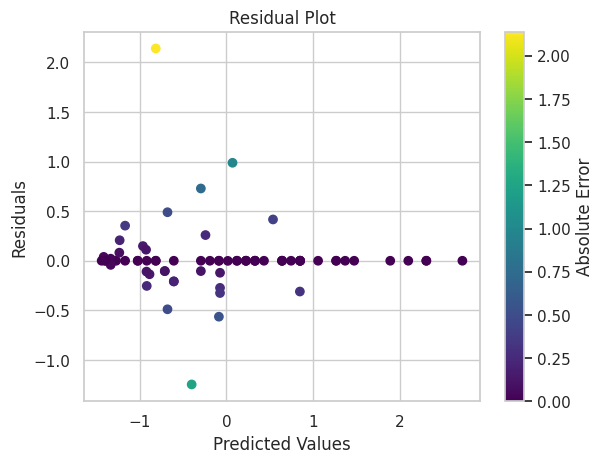

In [317]:
plt.scatter(y_pred, residuals, c=np.abs(residuals), cmap='viridis')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.colorbar(label="Absolute Error")
plt.show()

In [318]:
y_pred

array([ 0.74664008, -0.08591348, -0.07295687,  0.01721909, -1.41539745,
       -0.91846704,  0.64257089,  0.2262941 ,  1.37105525,  0.071231  ,
        1.47512445, -0.67910789, -0.60625946,  2.30767801, -1.16823311,
       -1.27230231, -1.23504554,  0.3303633 ,  1.05884767, -0.08591348,
        0.85070928, -0.29405187, -0.81439785, -1.02253624, -0.88644565,
       -0.07295687,  0.12222491,  0.64257089, -1.33474382,  0.85070928,
        2.30767801, -0.67910789,  0.84862789,  0.85070928,  0.85070928,
       -0.71032865,  0.2262941 ,  0.12222491, -1.39718534, -0.18998268,
       -0.40020245, -0.71032865, -1.23103263, -0.29405187,  0.53850169,
       -1.02253624,  0.64257089, -0.81439785, -0.08591348,  2.72395479,
        2.09953962,  0.4344325 , -0.60625946,  0.3303633 , -0.96238424,
       -0.29405187, -0.81439785, -0.92118117,  1.26698606,  1.89140123,
        0.2262941 , -1.16823311, -0.92658444,  0.3303633 , -0.60625946,
       -1.33474382, -0.91846704, -1.43881302,  1.26698606, -1.39

In [319]:
print(y)


0     -0.189983
1     -1.511661
2     -0.814398
3     -0.814398
4     -0.814398
5     -0.814398
6     -1.022536
7     -1.022536
8     -1.022536
9     -1.168233
10    -1.230675
11    -1.022536
12    -1.230675
13    -1.511661
14    -1.168233
15     0.642571
16     0.642571
17     0.642571
18     0.226294
19     0.018156
20     0.226294
21     0.018156
22     0.226294
23    -1.397185
24    -1.313930
25    -1.313930
26    -1.074571
27    -1.313930
28    -1.074571
29    -1.074571
30    -0.814398
31    -0.606259
32    -0.189983
33    -1.022536
34    -1.168233
35    -0.189983
36    -1.022536
37    -0.606259
38    -1.022536
39    -0.814398
40     0.538502
41    -1.230675
42    -0.085913
43     0.538502
44    -0.189983
45    -0.085913
46    -1.168233
47    -0.502190
48    -0.502190
49     0.850709
50    -0.502190
51    -1.334744
52    -1.334744
53    -1.438813
54    -1.334744
55     0.642571
56    -1.376372
57     0.226294
58     0.746640
59    -1.376372
60     0.330363
61    -0.606259
62     0

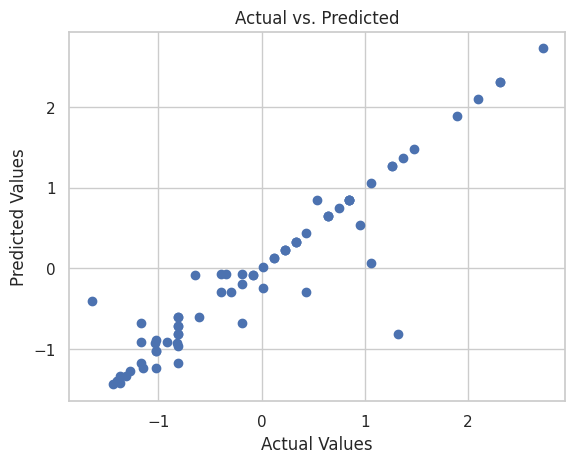

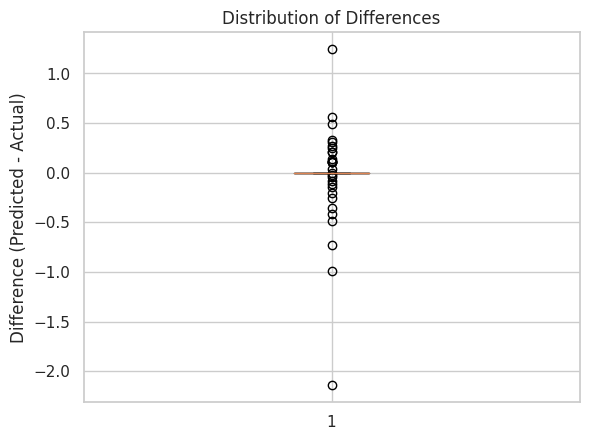

In [320]:

# Assuming predictions in 'y_pred' and actual values in 'y'
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df['Difference'] = comparison_df['Predicted'] - comparison_df['Actual']

# Scatter plot of actual vs. predicted
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()

# Box plot of differences
plt.boxplot(comparison_df['Difference'])
plt.ylabel("Difference (Predicted - Actual)")
plt.title("Distribution of Differences")
plt.show()

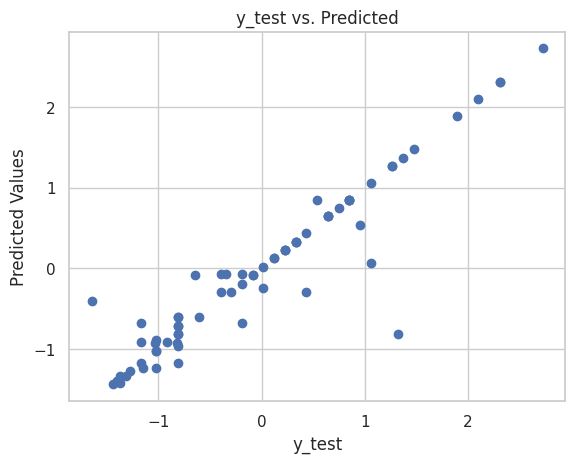

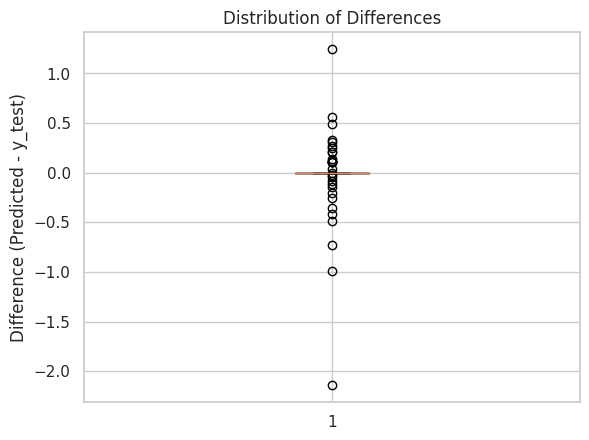

In [321]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your predictions in 'y_pred' and actual values in 'y'
comparison_df = pd.DataFrame({'y_test': y_test, 'Predicted': y_pred})
comparison_df['Difference'] = comparison_df['Predicted'] - comparison_df['y_test']

# Scatter plot of actual vs. predicted
plt.scatter(comparison_df['y_test'], comparison_df['Predicted'])
plt.xlabel("y_test")
plt.ylabel("Predicted Values")
plt.title("y_test vs. Predicted")
plt.show()

# Box plot of differences
plt.boxplot(comparison_df['Difference'])
plt.ylabel("Difference (Predicted - y_test)")
plt.title("Distribution of Differences")
plt.show()

<Axes: xlabel='Rear Camera', ylabel='Model'>

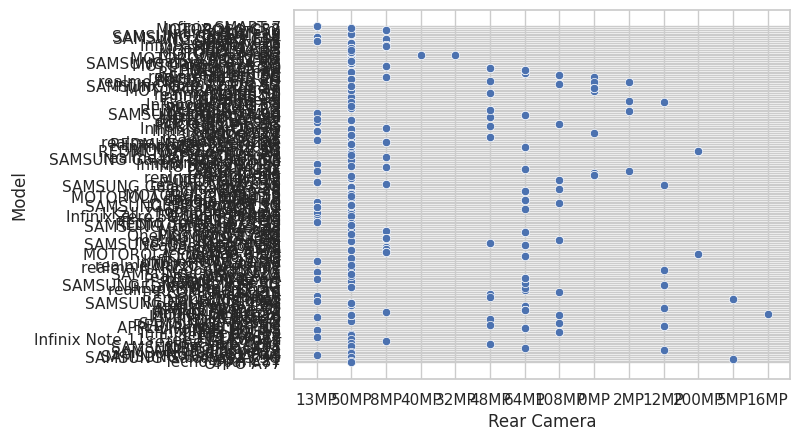

In [322]:
sns.scatterplot(x='Rear Camera',y='Model',data=category_data)

In [323]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [324]:
y_pred = model.predict(X_test)

In [325]:
mse = mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(mae)
print(r2)

0.3618620061023242
0.14432157008306035
0.8803458502116275


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [326]:
accuracy_score = model.score(X_test, y_test)
print("Accuracy:", accuracy_score)

Accuracy: 0.8803458502116275


In [327]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)

SVR()

In [328]:
y_pred = model.predict(X_test)

In [329]:
mse = mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(mae)
print(r2)

0.5823207855846876
0.3936958973312644
0.6901393862989006


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [330]:
accuracy_score = model.score(X_test, y_test)
print("Accuracy:", accuracy_score)

Accuracy: 0.6901393862989006


In [331]:
pip install xgboost

In [332]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [333]:
y_pred = model.predict(X_test)

In [334]:
mse = mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(mae)
print(r2)

0.31170966407716816
0.11524292413817297
0.9112144424271874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [335]:
accuracy_score = model.score(X_test, y_test)
print("Accuracy:", accuracy_score)

Accuracy: 0.9112144424271874


In [336]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [337]:
y_pred = model.predict(X_test)

In [338]:
mse = mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(mae)
print(r2)

0.4261690469992235
0.34243989840400785
0.8340391697111058


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [339]:
accuracy_score = model.score(X_test, y_test)
print("Accuracy:", accuracy_score)

Accuracy: 0.8340391697111058


In [340]:
#Create a dictionary to store the scores
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree', 'SVM', 'XGBoost', 'AdaBoost'],
    'MSE': [0.59, 0.361, 0.361, 0.58, 0.311, 0.426],
    'MAE' : [0.444, 0.14, 0.144, 0.393, 0.115, 0.335],
    'R2 Score': [0.671, 0.59, 0.880, 0.6901, 0.911, 0.833],
    'Accuracy': [0.671, 0.880, 0.880, 0.6901, 0.911, 0.833],
}
#create a dataFrame
df_scores = pd.DataFrame(data)

In [341]:
df_scores

,Model,MSE,MAE,R2 Score,Accuracy
0,Linear Regression,0.590,0.444,0.6710,0.6710
1,Random Forest,0.361,0.140,0.5900,0.8800
2,Decision Tree,0.361,0.144,0.8800,0.8800
3,SVM,0.580,0.393,0.6901,0.6901
4,XGBoost,0.311,0.115,0.9110,0.9110
5,AdaBoost,0.426,0.335,0.8330,0.8330


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'SVM'),
  Text(4, 0, 'XGBoost'),
  Text(5, 0, 'AdaBoost')])

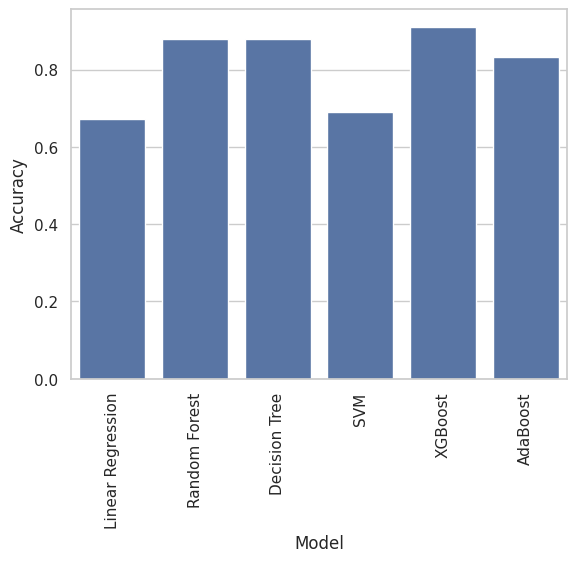

In [342]:
sns.barplot(x='Model',y='Accuracy',data=df_scores)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'SVM'),
  Text(4, 0, 'XGBoost'),
  Text(5, 0, 'AdaBoost')])

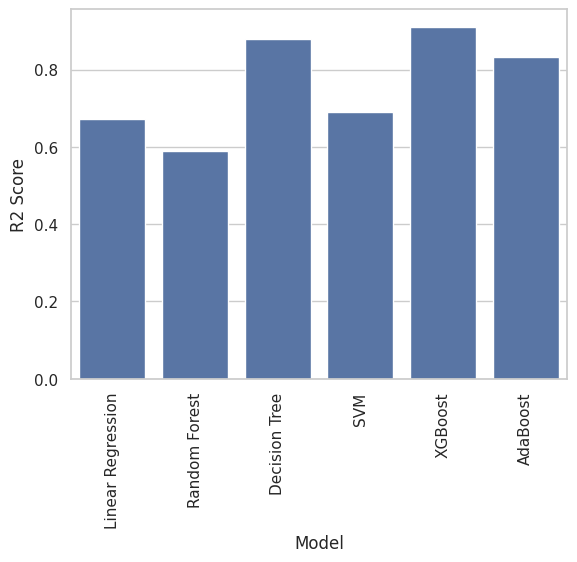

In [343]:
sns.barplot(x='Model',y='R2 Score',data=df_scores)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'SVM'),
  Text(4, 0, 'XGBoost'),
  Text(5, 0, 'AdaBoost')])

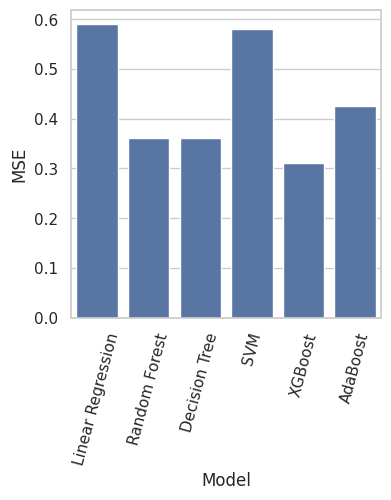

In [344]:
plt.figure(figsize=(4, 4))
sns.barplot(x='Model',y='MSE',data=df_scores)
plt.xticks(rotation=75)

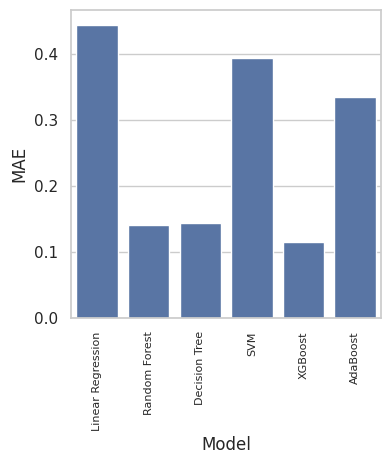

In [345]:
plt.figure(figsize=(4, 4))
sns.barplot(x='Model',y='MAE',data=df_scores)
plt.xticks(rotation=90,fontsize=8)
plt.show()
